#### Introduction

There have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. This study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well that relate to life expectancy. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

#### Importing important libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#### Reading the dataset into a Pandas Dataframe Object


In [3]:
data = pd.read_csv("Life_Expectancy_Data.csv")

#### taking a quick look at what the data looks like:

In [5]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### Since Status is Categorical ordinal, we can replace it with numerical distinct values.
We use Dataframe.replace() for that.

In [4]:
data.replace(['Developing', 'Developed'], [0, 1], inplace=True)
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### Performing data cleaning


Getting a look of the number of null values in the dataset. We will use isnull().sum() for that as it will count the number of null values in each column. 

In [7]:
data.isnull().sum()


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Replacing null values with the mean. For that we calculate the mean of all columns and use `fillna()` function to replace all null occurances with the mean. 

In [5]:
def replace_with_mean(s):
    if s != 'Country':
        mean = data[s].mean()
        data[s].fillna(mean, inplace=True)

for column in data.columns:
    replace_with_mean(column)


Now our data doesn't contain any null value

In [6]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

#### Getting general information about the dataset

In [10]:
data.describe()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,0.174268,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,...,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,0.379405,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,...,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,0.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,...,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,0.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,...,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,0.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,...,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


#### Calculating the correlation matrix of the dataset using `pandas.DataFrame.corr()` function

In [7]:
correlation_matrix = data.corr()
correlation_matrix

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,-0.001864,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,...,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Status,-0.001864,1.000000,0.481962,-0.315171,-0.112252,0.579371,0.454261,0.095642,-0.076955,0.310873,...,0.220098,0.289985,0.216763,-0.148590,0.445911,-0.041091,-0.367934,-0.366297,0.457302,0.491444
Life expectancy,0.169623,0.481962,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,...,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
Adult Mortality,-0.078861,-0.315171,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,...,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
infant deaths,-0.037415,-0.112252,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,...,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.048168,0.579371,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,...,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
percentage expenditure,0.031400,0.454261,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,...,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
Hepatitis B,0.089398,0.095642,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,...,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
Measles,-0.082493,-0.076955,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,...,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609
BMI,0.108327,0.310873,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,...,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105


In [12]:
[column for column in data.columns]


['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [15]:
data['Income composition of resources'].mean()


0.6275510645976182

In [16]:
data['Income composition of resources'].median()


0.662

In [17]:
data['Income composition of resources'].std()

0.20481974064387873

<AxesSubplot:>

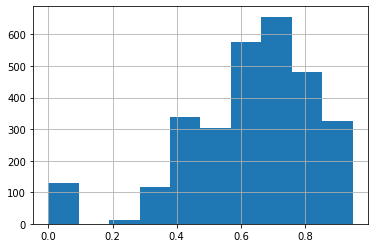

In [18]:
data['Income composition of resources'].hist()


In [19]:
data['Income composition of resources'].max(
) - data['Income composition of resources'].min()


0.948

In [8]:
import matplotlib.pyplot as plt  # matplot library
import seaborn as sns  # seaborn library
%matplotlib inline


In [21]:
#See the correlation between features and our target => Price
income_correlation = data.corr()['Life expectancy ']
income_correlation


Year                               0.169623
Status                             0.481962
Life expectancy                    1.000000
Adult Mortality                   -0.696359
infant deaths                     -0.196535
Alcohol                            0.391598
percentage expenditure             0.381791
Hepatitis B                        0.203771
Measles                           -0.157574
 BMI                               0.559255
under-five deaths                 -0.222503
Polio                              0.461574
Total expenditure                  0.207981
Diphtheria                         0.475418
 HIV/AIDS                         -0.556457
GDP                                0.430493
Population                        -0.019638
 thinness  1-19 years             -0.472162
 thinness 5-9 years               -0.466629
Income composition of resources    0.692483
Schooling                          0.715066
Name: Life expectancy , dtype: float64

In [22]:
#Use Groupby and Mean to understand the relation Between room_type and price
data[['Income composition of resources','Life expectancy ']].groupby(['Income composition of resources'],as_index=False).mean().sort_values(by='Life expectancy ',ascending=False)

,Income composition of resources,Life expectancy
575,0.890,85.84
618,0.936,84.38
617,0.934,84.00
610,0.926,84.00
614,0.931,84.00
...,...,...
59,0.357,45.30
88,0.391,44.40
53,0.348,44.30
21,0.302,41.00


/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


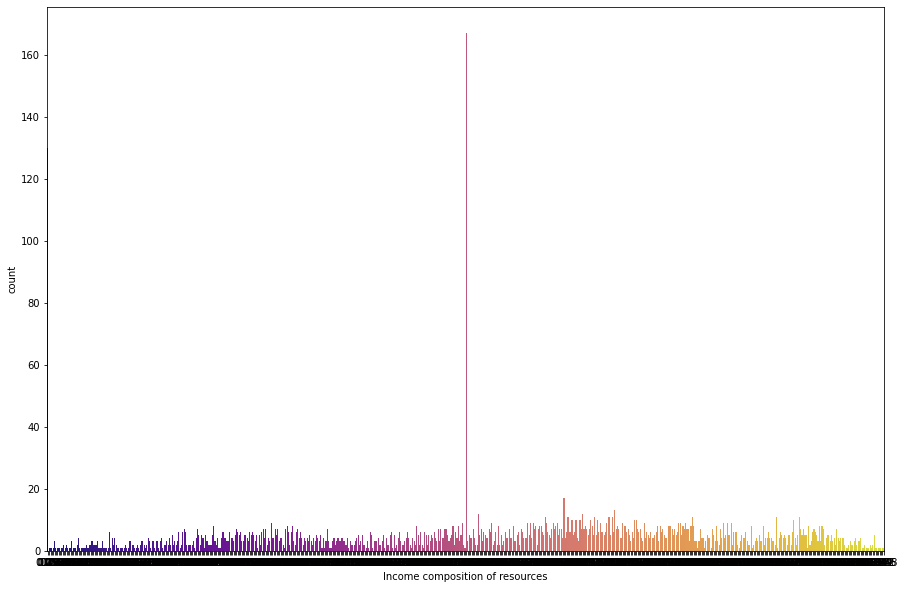

In [23]:
#Seaborn count plot for income. 
plt.figure(figsize=(15, 10))
sns.countplot(data['Income composition of resources'], palette="plasma")
plt.show()


/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


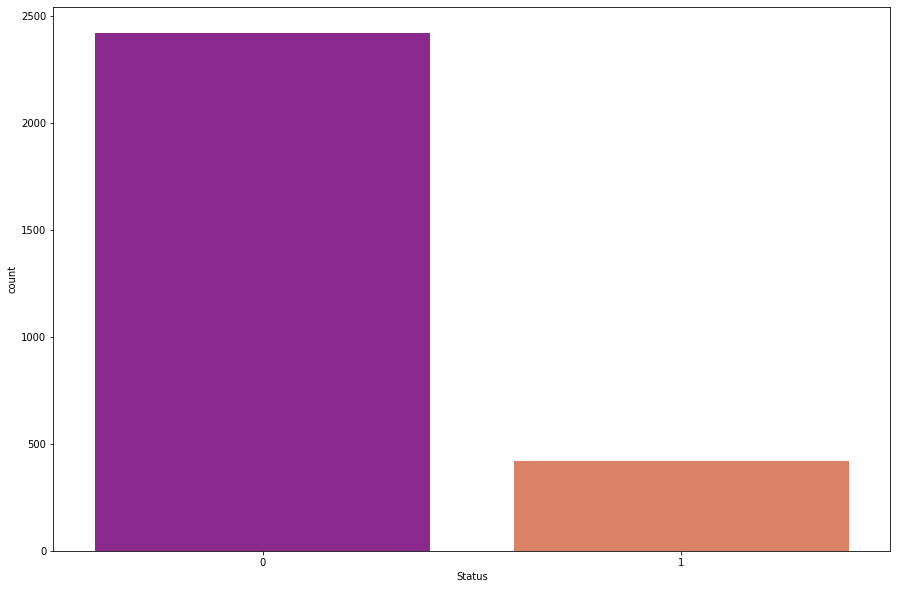

In [180]:
#Seaborn count plot for status.
plt.figure(figsize=(15, 10))
sns.countplot(data['Status'], palette="plasma")
plt.show()


/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


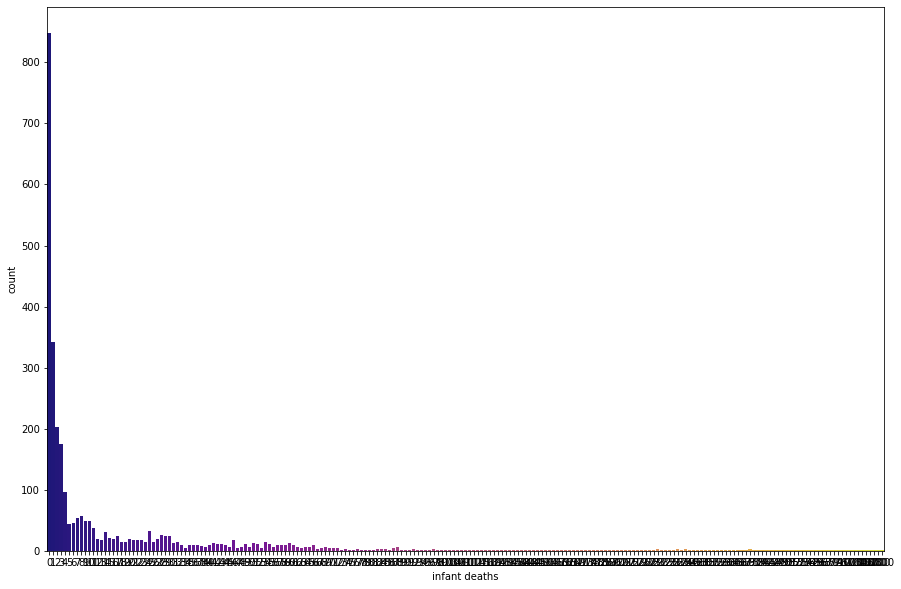

In [9]:
#Seaborn count plot for status.
plt.figure(figsize=(15, 10))
sns.countplot(data['infant deaths'], palette="plasma")
plt.show()


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

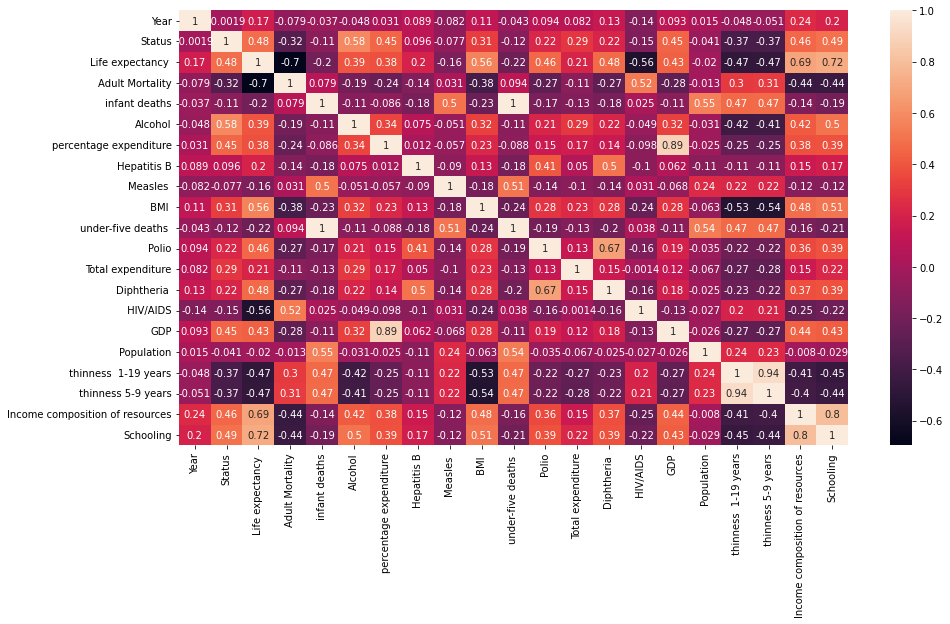

In [13]:
#Seaborn heatmap for the correlation between features
correlation_matrix = data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True)
data.columns


In [40]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [48]:
data.corr()['Life expectancy ']


Year                               0.169623
Status                             0.481962
Life expectancy                    1.000000
Adult Mortality                   -0.696359
infant deaths                     -0.196535
Alcohol                            0.391598
percentage expenditure             0.381791
Hepatitis B                        0.203771
Measles                           -0.157574
 BMI                               0.559255
under-five deaths                 -0.222503
Polio                              0.461574
Total expenditure                  0.207981
Diphtheria                         0.475418
 HIV/AIDS                         -0.556457
GDP                                0.430493
Population                        -0.019638
 thinness  1-19 years             -0.472162
 thinness 5-9 years               -0.466629
Income composition of resources    0.692483
Schooling                          0.715066
Name: Life expectancy , dtype: float64

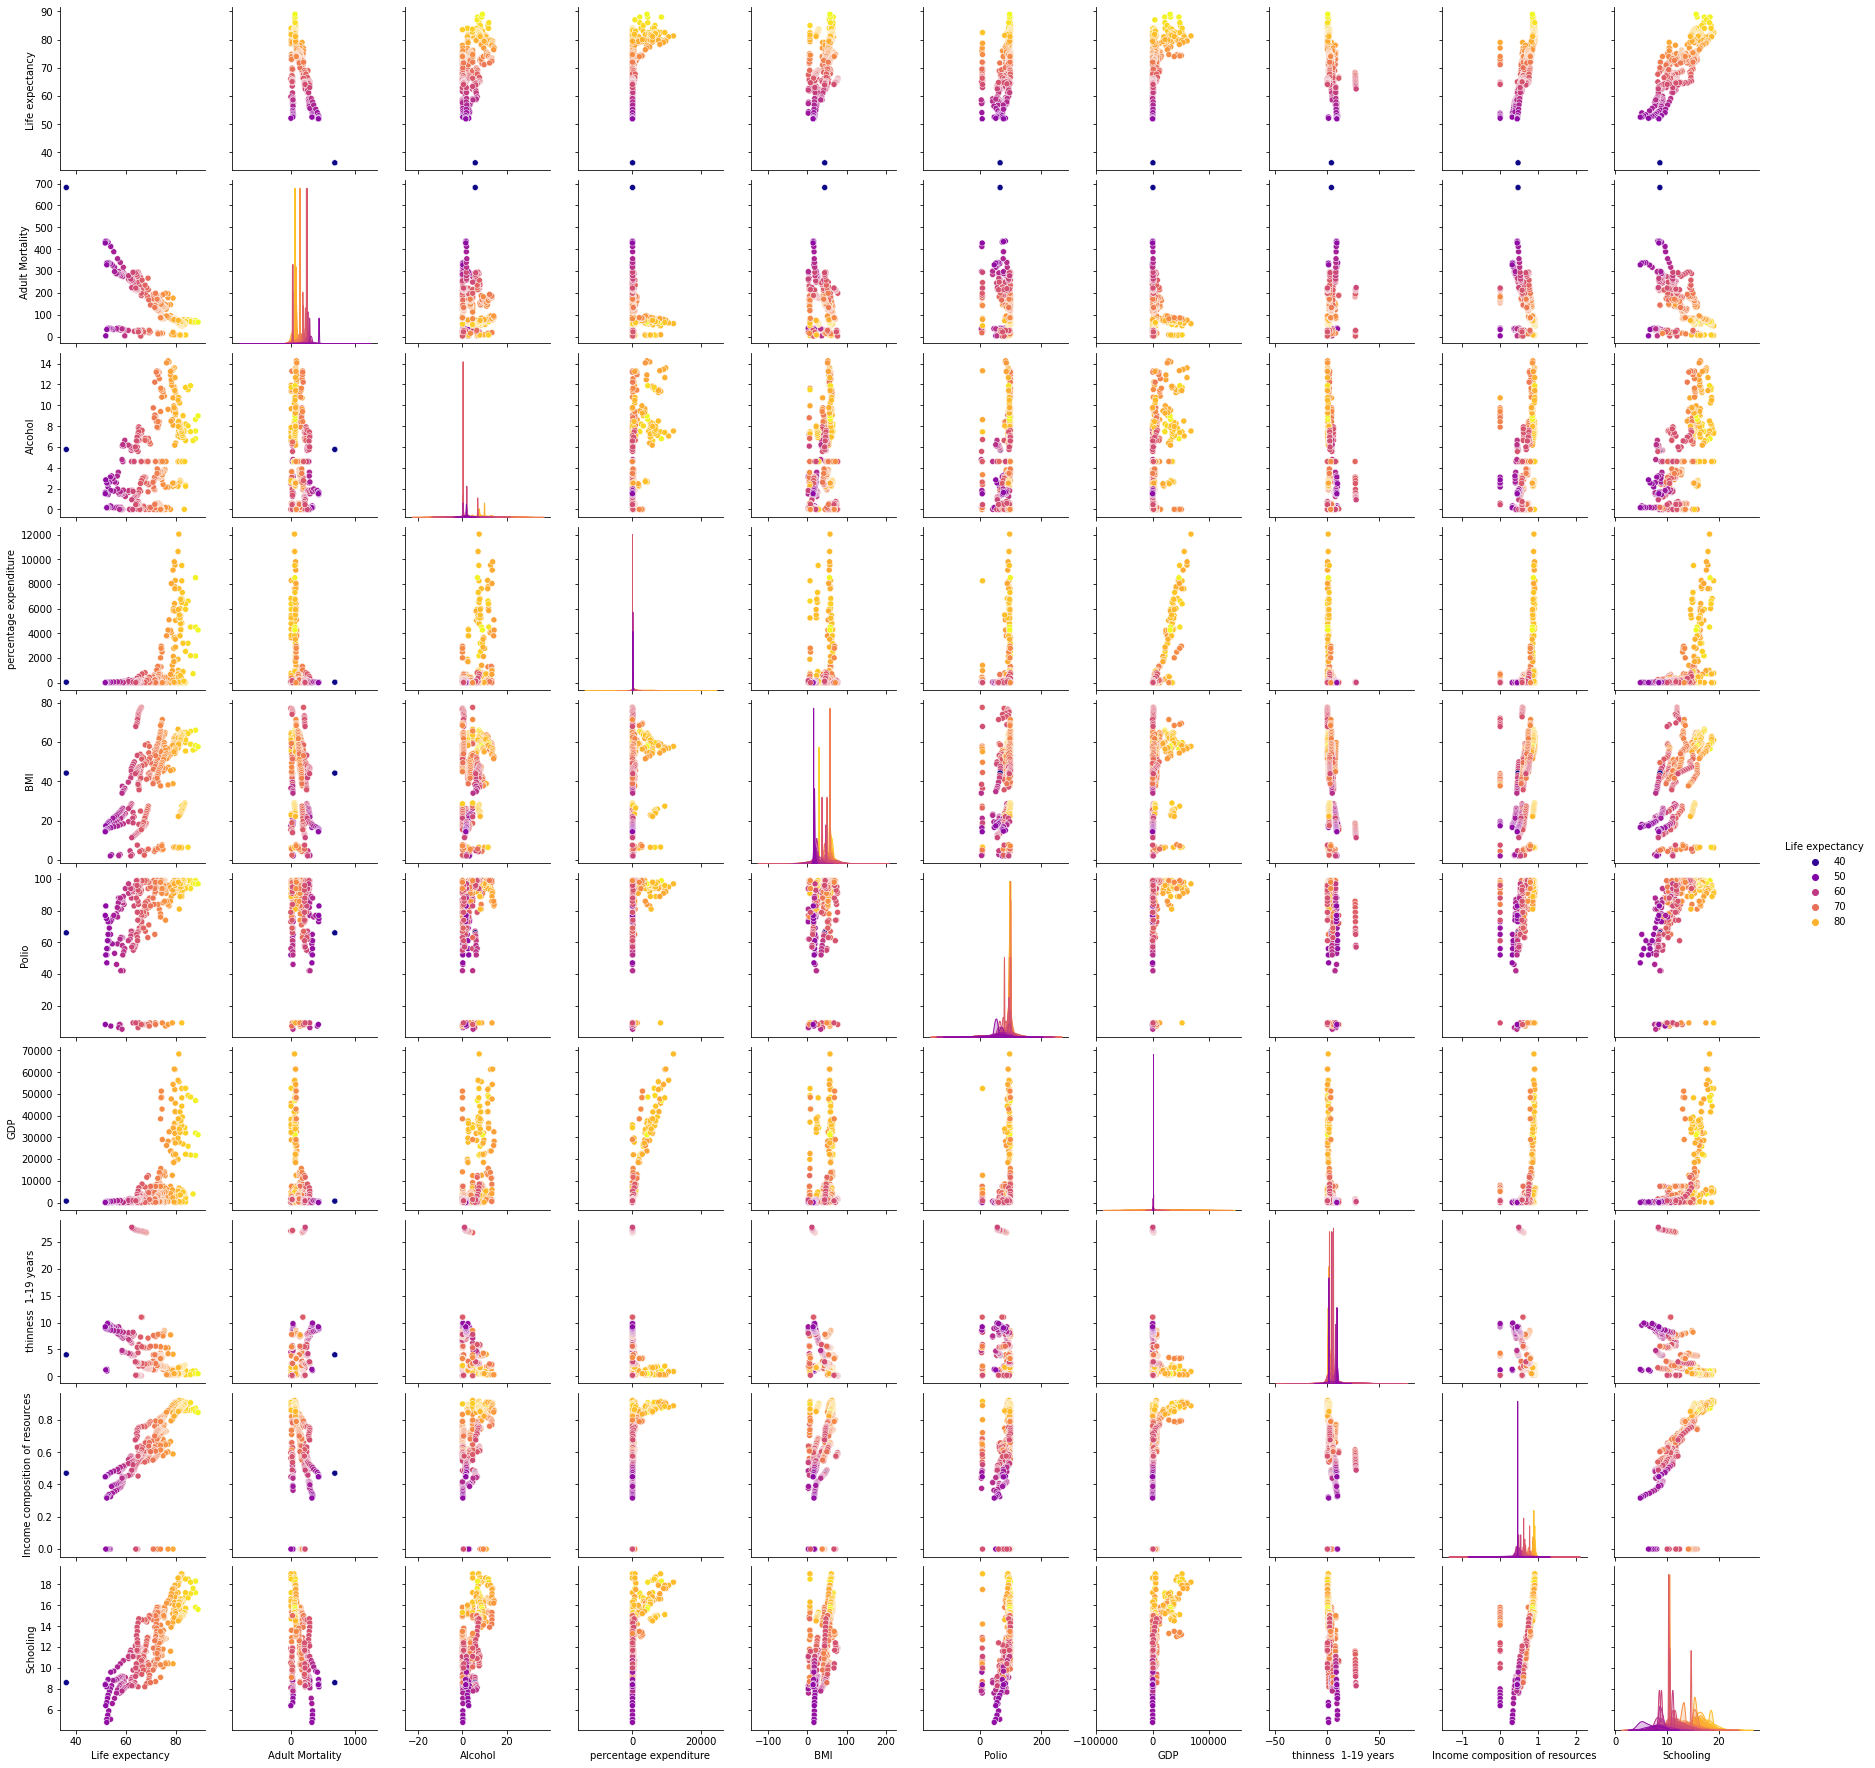

In [14]:
#Seaborn pairplot for correlation of features and Price
sns.pairplot(data[1000:1400].drop(['Country', 'Year'], axis=1),hue='Life expectancy ',palette='plasma', vars=['Life expectancy ', 'Adult Mortality', 'Alcohol', 'percentage expenditure', ' BMI ', 'Polio', 'GDP', ' thinness  1-19 years', 'Income composition of resources', 'Schooling'])

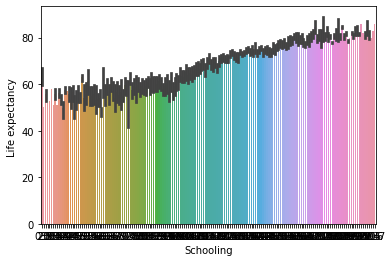

In [17]:
#Seaborn barplot for room_type and price
sns.barplot(x='Schooling', y='Life expectancy ', data=data)
plt.show()


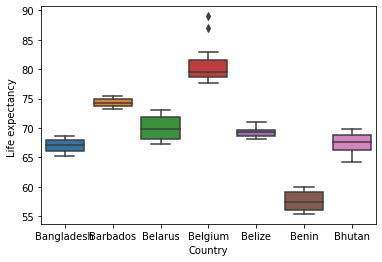

In [24]:
#Seaborn Boxplot for country and life expectancy
sns.boxplot(x='Country', y='Life expectancy ', data=data[200:300])
plt.show()

/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Schooling', ylabel='Income composition of resources'>

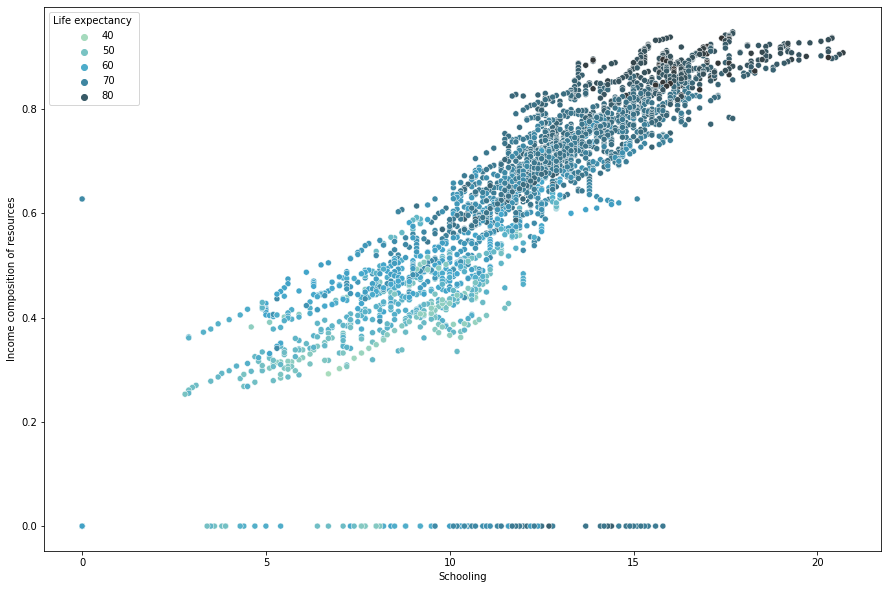

In [33]:
#Seaborn Scatter plot for Schooling and Income composition of resources with respect to Life expectancy
plt.figure(figsize=(15,10))
sns.scatterplot(data['Schooling'],data['Income composition of resources'],hue=data['Life expectancy '],palette='GnBu_d')

In [24]:
[column for column in data.columns]

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [10]:
data.dtypes

Country                             object
Year                                 int64
Status                               int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [29]:
data['infant deaths'].unique()


array([  62,   64,   66,   69,   71,   74,   77,   80,   82,   84,   85,
         87,   88,    0,    1,   21,   20,   19,   67,   72,   75,   78,
         81,   90,   92,   94,   95,   96,   97,    8,    9,   10,   11,
         12,    5,    6,    7,   98,  104,  111,  118,  126,  135,  144,
        154,  164,  174,  185,  196,  207,  219,  231,   25,   13,   14,
         15,    2,   42,   44,   46,   49,   51,   54,   57,   61,   65,
         70,  103,   38,   39,   40,   41,   43,   45,   47,   48,   22,
         23,   24,   58,   59,   60,   63,   16,   17,   18,   27,   50,
         53,   56,  157,  171,  201,  215,  248,  266,  285,  307,  332,
        360,  391,  422,  457,  490,  236,  237,  238,  239,  235,  233,
        232,  229,  227,  226,   55,    3,    4,  136,  140,  145,  150,
        156,  162,  169,  177,  186,  206,  217,  228,  246,  253,   37,
         26,   28,   29,   30,   31,   32,   33,   34,   35,   36,  910,
        957, 1000, 1100, 1200, 1300, 1400, 1500, 16